In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


In [2]:
file_path = '/kaggle/input/bank-marketing/bank-additional-full.csv'
df = pd.read_csv(file_path, sep=';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [7]:
no=df[df['y']=='no']
no.age.describe()

count    36548.000000
mean        39.911185
std          9.898132
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         95.000000
Name: age, dtype: float64

In [8]:
yes=df[df['y']=='yes']
yes.age.describe()

count    4640.000000
mean       40.913147
std        13.837476
min        17.000000
25%        31.000000
50%        37.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64

In [9]:
no_sample=no.sample(n=4640,random_state=1)

In [10]:
new_data = pd.concat([no_sample, yes])
new_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20507,35,self-employed,married,university.degree,no,no,no,cellular,aug,tue,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
33693,35,self-employed,single,high.school,no,yes,no,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
641,29,admin.,married,high.school,no,yes,no,telephone,may,tue,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10478,37,admin.,married,high.school,no,no,no,telephone,jun,tue,...,16,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
1582,44,technician,married,professional.course,unknown,no,yes,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt



#  preparing categorical data numerical input.

In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply LabelEncoder to each column in the DataFrame
data_df = new_data.apply(encoder.fit_transform)

# Now encoded_features contains your original DataFrame with string values replaced by integers
data_df


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
20507,18,6,1,6,0,0,0,0,1,3,...,1,26,0,1,9,13,17,289,10,0
33693,18,6,2,3,0,2,0,0,6,4,...,0,26,1,0,3,8,4,197,6,0
641,12,0,1,3,0,2,0,1,6,3,...,2,26,0,1,8,18,16,266,8,0
10478,20,0,1,3,0,0,0,1,4,3,...,15,26,0,1,9,23,8,284,10,0
1582,27,9,1,5,1,0,2,1,6,0,...,3,26,0,1,8,18,16,264,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,45,5,1,6,0,2,0,0,7,2,...,0,1,6,2,5,25,0,165,0,1
41178,45,5,1,6,0,0,0,0,7,2,...,1,6,3,2,5,25,0,165,0,1
41181,20,0,1,6,0,2,0,0,7,0,...,0,26,0,1,5,25,0,162,0,1
41183,56,5,1,5,0,2,0,0,7,0,...,0,26,0,1,5,25,0,162,0,1


In [13]:
data_df.y.value_counts()

y
0    4640
1    4640
Name: count, dtype: int64

# make values within the range [0, 1]

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on your data and transform it
normalized_data = scaler.fit_transform(data_df)

# normalized_data is now your data with each feature scaled to the range [0, 1]
normalized_data

array([[0.24324324, 0.54545455, 0.33333333, ..., 0.9829932 , 1.        ,
        0.        ],
       [0.24324324, 0.54545455, 0.66666667, ..., 0.67006803, 0.6       ,
        0.        ],
       [0.16216216, 0.        , 0.33333333, ..., 0.9047619 , 0.8       ,
        0.        ],
       ...,
       [0.27027027, 0.        , 0.33333333, ..., 0.55102041, 0.        ,
        1.        ],
       [0.75675676, 0.45454545, 0.33333333, ..., 0.55102041, 0.        ,
        1.        ],
       [0.36486486, 0.81818182, 0.33333333, ..., 0.55102041, 0.        ,
        1.        ]])

In [15]:
import numpy as np

# Compute the correlation matrix using numpy's corrcoef() function
corre = np.corrcoef(normalized_data, rowvar=False)




<Axes: >

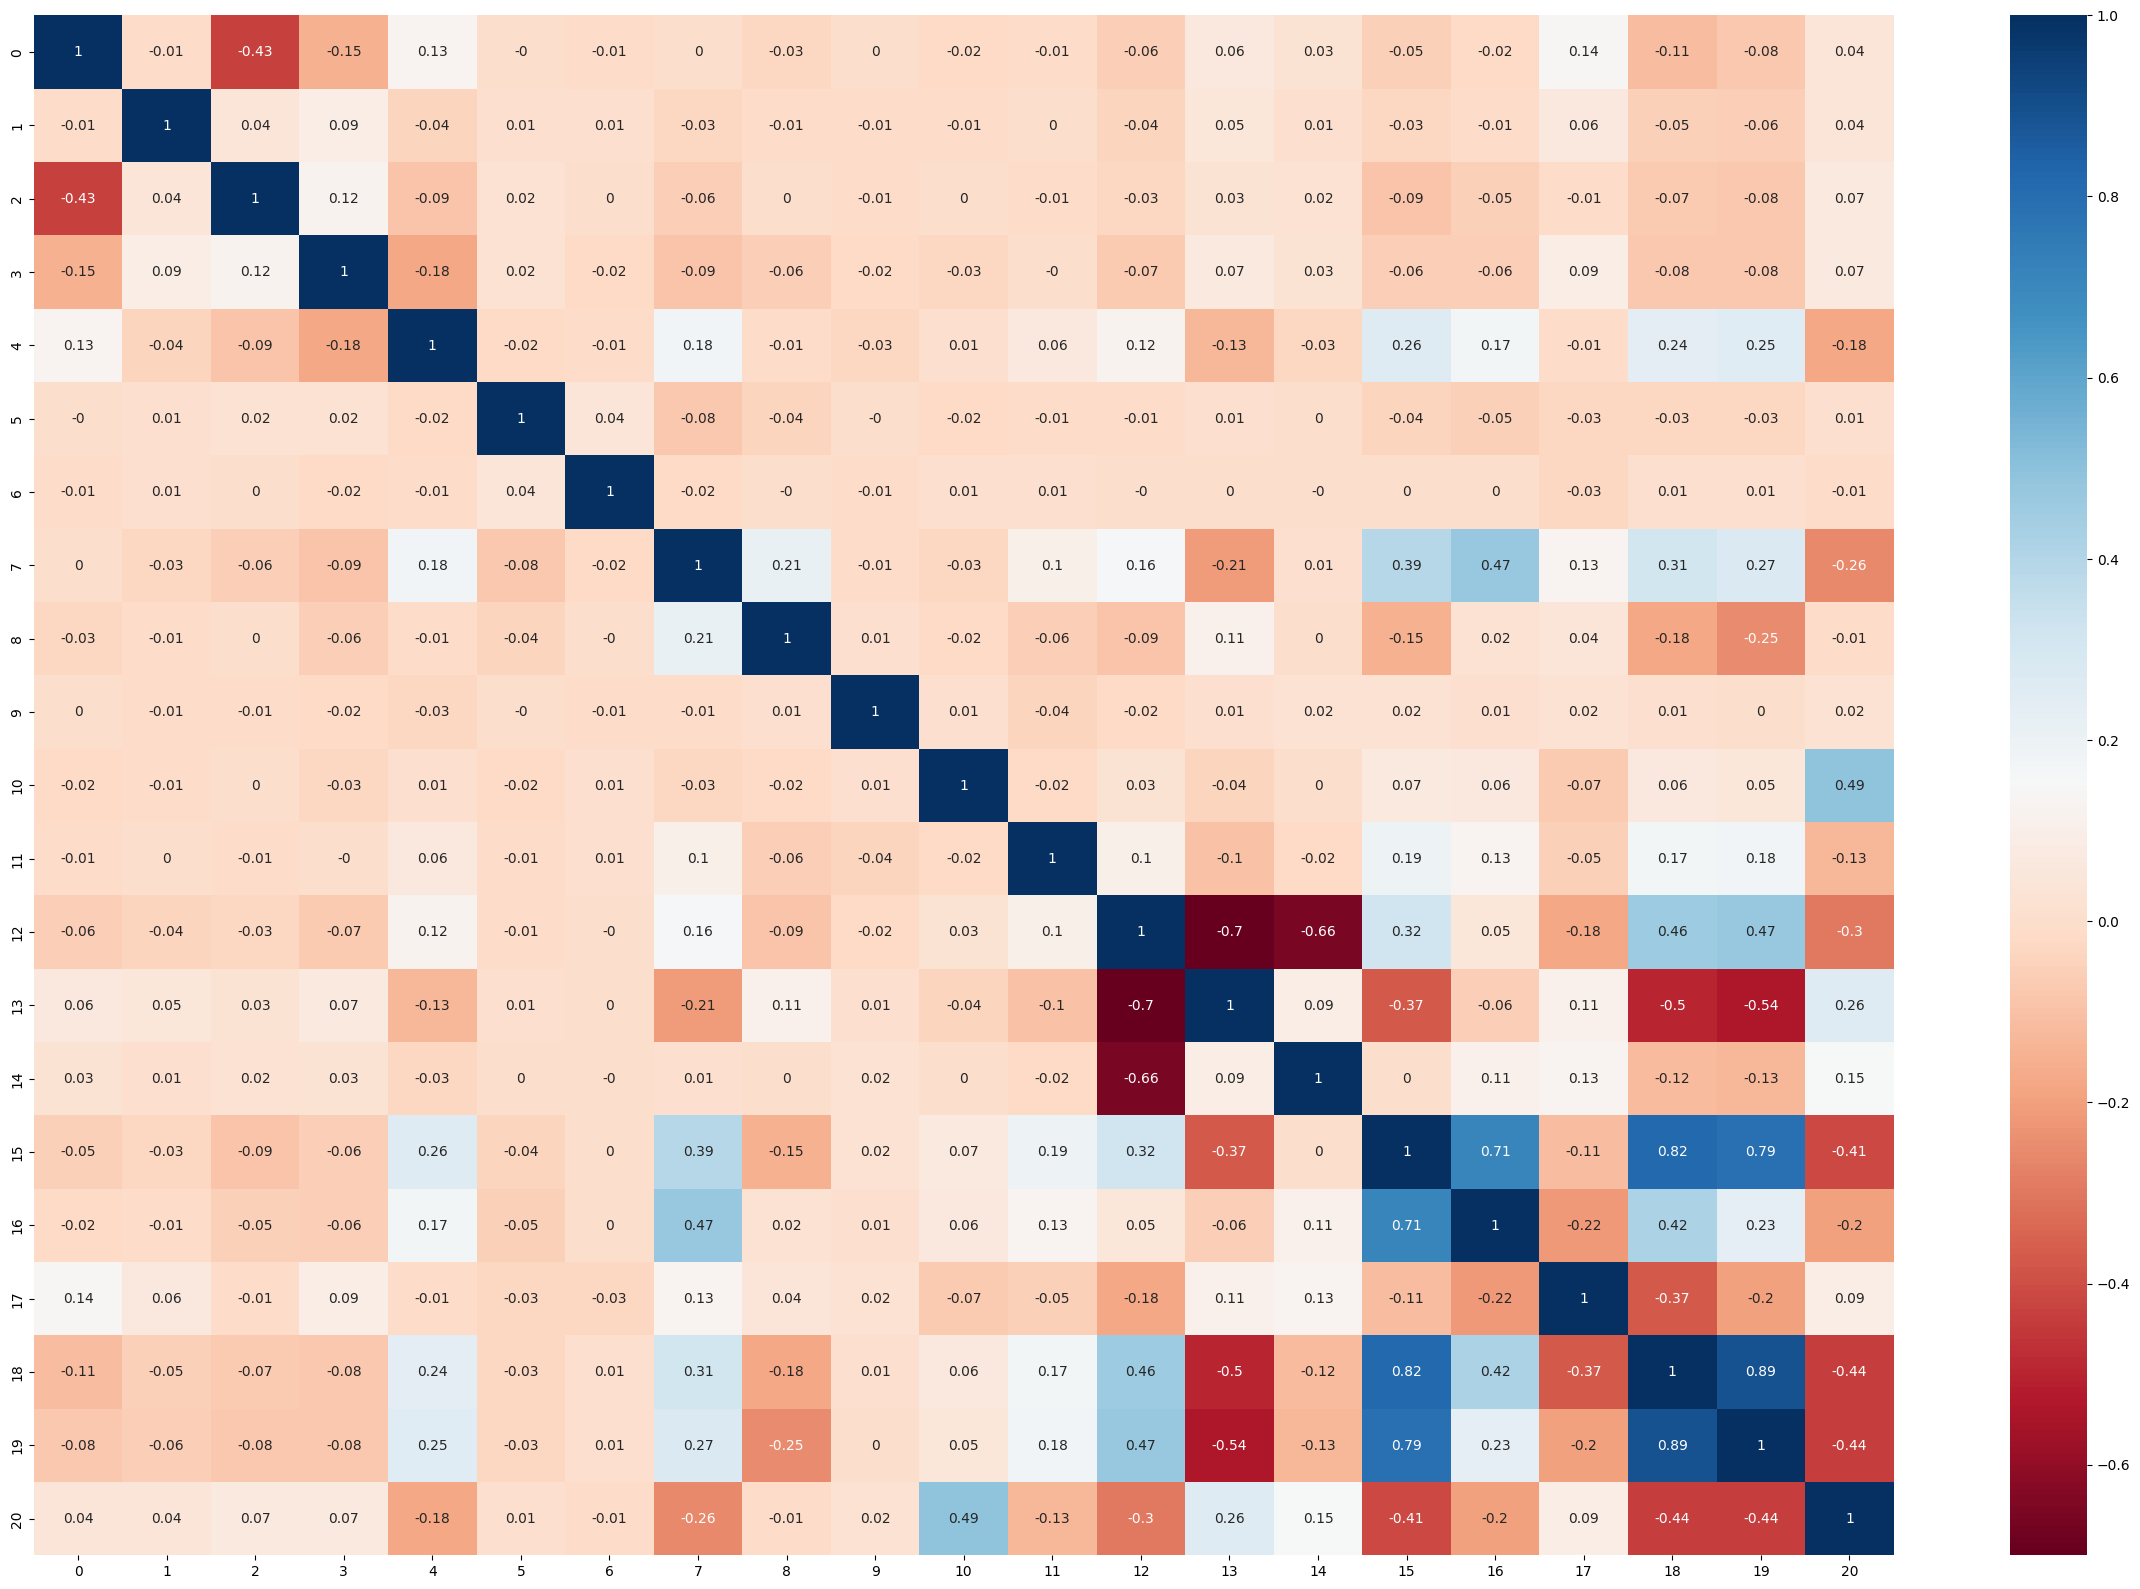

In [16]:
plt.figure(figsize=(30, 20))
corre_rounded = np.round(corre,2)
sns.heatmap(corre_rounded, cmap='RdBu', annot=True)


In [17]:

w=data_df.iloc[:,[4,7,10,11,12,15,16,18,19]]
x=scaler.fit_transform(w)
x

array([[0.        , 0.        , 0.07692308, ..., 0.52      , 0.9829932 ,
        1.        ],
       [0.        , 0.        , 0.07478632, ..., 0.32      , 0.67006803,
        0.6       ],
       [0.        , 1.        , 0.01780627, ..., 0.72      , 0.9047619 ,
        0.8       ],
       ...,
       [0.        , 0.        , 0.19729345, ..., 1.        , 0.55102041,
        0.        ],
       [0.        , 0.        , 0.23504274, ..., 1.        , 0.55102041,
        0.        ],
       [0.        , 0.        , 0.31196581, ..., 1.        , 0.55102041,
        0.        ]])

In [18]:
y=data_df.iloc[:,-1]
y


20507    0
33693    0
641      0
10478    0
1582     0
        ..
41174    1
41178    1
41181    1
41183    1
41186    1
Name: y, Length: 9280, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, recall_score

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

# SVM

In [21]:
sv=SVC(kernel='linear')

sv.fit(x_train,y_train)

SVC(kernel='linear')

In [22]:
pred=sv.predict(x_test)
acc=accuracy_score(y_test,pred)
print('accuracy is : ',acc)

accuracy is :  0.8399784482758621


# LogisticRegression

In [23]:
log_reg = LogisticRegression() 
log_reg.fit(x_train,y_train)
pred_2=log_reg.predict(x_test)

In [24]:
acc=accuracy_score(y_test,pred_2)
print('accuracy is : ',acc)

accuracy is :  0.837823275862069


# KNeighborsClassifier

In [25]:

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(x_train, y_train)

y_pred = knn_classifier.predict(x_test)


In [26]:
acc=accuracy_score(y_test,y_pred)
print('accuracy is : ',acc)

accuracy is :  0.8636853448275862


# DecisionTreeClassifier

In [27]:
tree=DecisionTreeClassifier()
tree.fit(x_train, y_train)
pred_3=tree.predict(x_test)

In [28]:
acc=accuracy_score(y_test,pred_3)
print('accuracy is : ',acc)

accuracy is :  0.8216594827586207


# RandomForestClassifier

In [29]:
forest=RandomForestClassifier()
forest.fit(x_train,y_train)
pred_4=forest.predict(x_test)

In [30]:
acc=accuracy_score(y_test,pred_4)
print('accuracy is : ',acc)

accuracy is :  0.8631465517241379


# GaussianNB


In [31]:
model = GaussianNB()
model.fit(x_train, y_train)
pred_5 = model.predict(x_test)



In [32]:
acc=accuracy_score(y_test,pred_5)
print('accuracy is : ',acc)

accuracy is :  0.7720905172413793
